In [1]:
import numpy as np
import pandas as pd
from math import ceil
import psycopg2
from time import time
import psycopg2.extras
from copy import copy
import matplotlib.pyplot as plt
import seaborn as sns

sqluser = 'postgres'
dbname = 'test'
schema_name = 'mimiciii'
password = 'postgres'
db_schema = 'set search_path to ' + schema_name + ';'
con = psycopg2.connect(dbname=dbname, user=sqluser, password=password, host='/var/run/postgresql/')
cursor = con.cursor()
con.commit()
context = pd.read_csv('/home/ubuntu/munge/output/context.csv')



/home/ubuntu/anaconda3/envs/eric/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/eric/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:

nitemids = pd.read_csv('/home/ubuntu/munge/nitem_mapping.csv')


# ss = 'ANY( VALUES (' + ') ,('.join([str(l) for l in lst]) + '))'

in_nitems = nitemids[nitemids['table']=='chartevents'].class2.unique().tolist()
# in_nitems

In [3]:
for i in in_nitems:
    t = time()
    string = '''
    select icustay_id, avg (valuenum) average_{0}, min(valuenum) minimum_{0}, max(valuenum) maximum_{0}
    , count(*) cnt_{0}
    from chartevents
    where class2 = '{0}'
    group by icustay_id, nitemid 
    order by icustay_id, nitemid

    '''.format(i)
    tempdf = pd.read_sql(string, con)
    context = context.merge(tempdf, how="left", left_on="icustay_id", right_on="icustay_id")

#     tempdf.to_csv('/home/ubuntu/analyze_shallow/output/itemid_{}_summary.csv'.format(i))
    print('{} took {}'.format(i,time()-t))

ALT took 3.551210403442383
Albumin took 3.4114816188812256
Alkaline_Phosphate took 3.4133999347686768
AST took 3.4146764278411865
HCO3 took 3.4084131717681885
Total_Bilirubin took 3.418687105178833
BUN took 3.451479911804199
Calcium took 3.4277119636535645
Capillary_Refill took 3.401888608932495
Chloride took 3.4311368465423584
Cholesterol took 3.365532398223877
Creatinine took 3.4294626712799072
Arterial_Blood_Pressure_diastolic took 3.721524238586426
GCS__Eye_Opening took 3.6318411827087402
GCS__Motor_Response took 3.5405433177948
GCS__Verbal_Response took 3.517120838165283
Glucose took 3.535766363143921
Height took 3.38020396232605
Hematocrit took 3.4809834957122803
Hemoglobin took 3.4425528049468994
Lactic_Acid took 3.400681734085083
Magnesium took 3.446014881134033
Arterial_BP_Mean took 3.777590751647949
SaO2 took 3.3856303691864014
PTT took 3.4356162548065186
Arterial_pH took 3.5130021572113037
Platelets took 3.461836338043213
PEEP took 3.3986918926239014
Potassium took 3.5292904

In [144]:
cnt_col = [col for col in context if col.startswith('average')]
# df = pd.DataFrame(context[cnt_col].count())
# df.sort_values(by=0, ascending=False)
# cnt_col
columns=['average_respiratory_rate','average_height','age_at_adm','ser_ind']
df = context[columns]
df_norm = df[np.abs(df-df.mean()) <= (2*df.std())]
# df_norm = (df - df.mean())/(df.max()-df.min())
# df_norm.fillna(0)

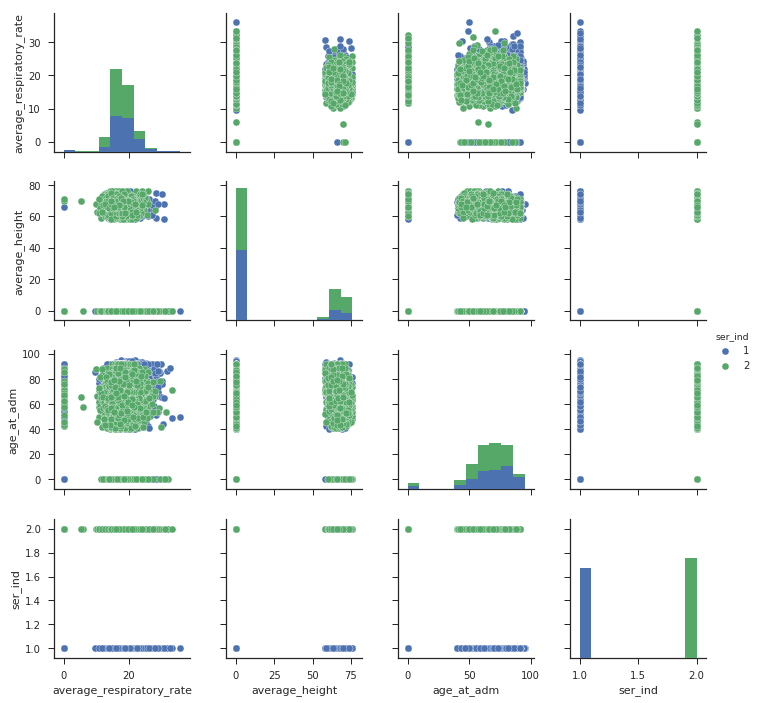

In [145]:
sns.set(style='ticks')
sns.pairplot(df_norm.fillna(0), hue='ser_ind')

In [133]:
# use this to convert strings into ints
def stringtodict(df,col):
    a = df[col].unique().tolist()
    b={}
    n=0
    for i in a:
        b[i] = n
        n += 1
    return b

In [135]:
stringtodict(context,'insurance')

{'Private': 0, 'Medicare': 1, 'Medicaid': 2, 'Government': 3, 'Self Pay': 4}

In [2]:
import pandas as pd
from time import time



sqluser = 'postgres'
sourcedb = 'cc_all'
schema_name = 'mimiciii'
password = 'postgres'
targetdb = 'test'
newschema = 'mimic_ss'

context = pd.read_csv('/home/ubuntu/munge/output/context.csv')


# converts categorical features to numerical
def stringtodict(df,col):
    a = df[col].unique().tolist()
    b={}
    n=0
    for i in a:
        b[i] = n
        n += 1
    return b

# appends timeseries summary to static tables
def itemidmap(table, value, con):
    nitemids = pd.read_csv('/home/ubuntu/munge/nitem_mapping.csv')
    in_nitems = nitemids[nitemids['table']==table].class2.unique().tolist()
    for i in in_nitems:
        t = time()
        string = '''
        select icustay_id, avg ({1}) average_{0}, min({1}) minimum_{0}, max({1}) maximum_{0}
        , count(*) cnt_{0}
        from {2}
        where class2 = '{0}'
        group by icustay_id, nitemid 
        order by icustay_id, nitemid

        '''.format(i,value, table)
#         tempdf = pd.read_sql(string, con=con)
#         context = context.merge(tempdf, how="left", left_on="icustay_id", right_on="icustay_id")
#         print('{} took {}'.format(i,time()-t))
        print(string)


timetables = {'outputevents':'value'
              ,'chartevents':'valuenum'
              ,'inputevents_mv':'amount'
             }



In [ ]:
for key in timetables:
    itemidmap(key,timetables[key],con)

In [ ]:
itemidmap('outputevents','value',con)

In [ ]:
string ='''select icustay_id, avg ({1}) average_{0}, min({1}) minimum_{0}, max({1}) maximum_{0}
        , count(*) cnt_{0}
        from timetable
        where class2 = '{0}'
        group by icustay_id, nitemid 
        order by icustay_id, nitemid

        '''.format(i,value, table)